In [44]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import os
import json

model = AutoModelForTokenClassification.from_pretrained("lwachowiak/Metaphor-Detection-XLMR")
tokenizer = AutoTokenizer.from_pretrained("lwachowiak/Metaphor-Detection-XLMR")
metaphor_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

def count_label_1(entities):
    count = 0
    for entity in entities:
        if entity['entity_group'] == 'LABEL_1':
            count += 1
    return count

def process_text_with_hugging_face(texts, filenames):
    metaphor_counts = {}
    for i, text in enumerate(texts):
        processed_text = metaphor_pipeline(text)
        print(f"Processing file with the model: {i}" )
        count = count_label_1(processed_text)
        file_name = filenames[i]
        metaphor_counts[file_name] = count
    return metaphor_counts

def load_data(folder_path):
    root_folder = folder_path

    filenames = []
    text_data = []

    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Loading file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            file_for_end = file_path.split('\\')[2]
            filenames.append(file_for_end)
            text_data.append(text)

    return text_data, filenames

loaded_data, filenames = load_data('texts')

Loading file: defoe_crusoe.txt
Loading file: fielding_tom_jones.txt
Loading file: richardson_pamela.txt
Loading file: swift_gulliver.txt
Loading file: bronte_jane_eyre.txt
Loading file: dickens_bleak_house.txt
Loading file: eliot_middlemarch.txt
Loading file: shelley_frankenstein.txt
Loading file: conrad_heart.txt
Loading file: hardy_jude.txt
Loading file: lawrence_sons_and_lovers.txt
Loading file: woolf_dalloway.txt


In [45]:
filenames

['defoe_crusoe.txt',
 'fielding_tom_jones.txt',
 'richardson_pamela.txt',
 'swift_gulliver.txt',
 'bronte_jane_eyre.txt',
 'dickens_bleak_house.txt',
 'eliot_middlemarch.txt',
 'shelley_frankenstein.txt',
 'conrad_heart.txt',
 'hardy_jude.txt',
 'lawrence_sons_and_lovers.txt',
 'woolf_dalloway.txt']

In [46]:
count_em_all = process_text_with_hugging_face(loaded_data, filenames)

Processing file with the model: 0
Processing file with the model: 1
Processing file with the model: 2
Processing file with the model: 3
Processing file with the model: 4
Processing file with the model: 5
Processing file with the model: 6
Processing file with the model: 7
Processing file with the model: 8
Processing file with the model: 9
Processing file with the model: 10
Processing file with the model: 11


In [47]:
df = pd.DataFrame.from_dict(count_em_all, orient='index')
df.head()
df.rename(columns={None: 'text', 0: 'metaphor_counts'}, inplace=True)
df.head()

,metaphor_counts
defoe_crusoe.txt,53
fielding_tom_jones.txt,47
richardson_pamela.txt,39
swift_gulliver.txt,30
bronte_jane_eyre.txt,27


<AxesSubplot:>

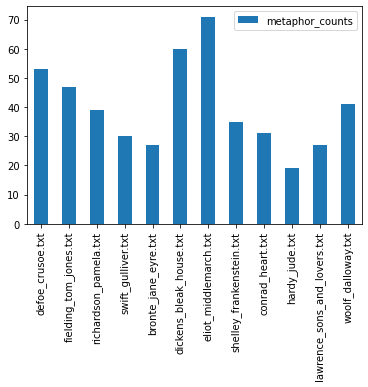

In [48]:
df.plot(kind='bar')